# Relatório

Este relatório explora e discute os resultados de diferentes técnicas para redução de dimensionalidade como o Piecewise Aggregate Approximation (PAA) e Autoencoders aplicados a séries temporais, utilizando a métrica Dynamic Time Warping (DTW) para avaliação de desempenho.

### Datasets utilizados:

- ACSF1
- CinCECGTors
- EOGHorizontalSigna
- EOGVerticalSigna
- EthanolLeve
- HandOutline
- Haptic
- HouseTwent
- InlineSkat
- Malla
- MixedShapesRegularTrai
- MixedShapesSmallTrai
- Phonem
- PigAirwayPressur
- PigArtPressur
- PigCV
- Roc
- SemgHandGenderCh
- SemgHandMovementCh
- SemgHandSubjectCh
- StarLightCurve

In [3]:
# Algumas importações básicas necessárias para análise dos resultados
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1. Piecewise Aggregate Approximation (PAA)

Iniciaremos as análises pelos resultados obtidos com a técnica PAA.

In [5]:
# Começamos carregando os resultados dos testes de DTW obtidos nesta pesquisa.

# Para isso definimos o caminho onde sera carregado o resultados dos testes
results_path = '../tests/dtw/paa/results.csv'
# E o link do repositório onde os resultados estão armazenados
url = 'https://drive.google.com/uc?id=1b09xr9EIz9RjFFV34SyYF0f2N84ilOL-'

import os

# Se o arquivo não existir, baixa; caso contrário, pula o download.
if not os.path.exists(results_path):
  os.makedirs(os.path.dirname(results_path), exist_ok=True)
  import gdown
  gdown.download(url, results_path, quiet=False)
else:
  print(f"Arquivo já existe em: {results_path} — download ignorado.")

# Carrega o DataFrame
paa_results = pd.read_csv(results_path)
paa_results.head()

Arquivo já existe em: ../tests/dtw/paa/results.csv — download ignorado.


,dataset,original_size,reduction_rate,reduced_size,aggregation,instance_index,dtw
0,ACSF1,1460,0.9,146,average,0,1.530131
1,ACSF1,1460,0.9,146,average,1,1.476281
2,ACSF1,1460,0.9,146,average,2,1.554030
3,ACSF1,1460,0.9,146,average,3,1.525567
4,ACSF1,1460,0.9,146,average,4,1.596378


Cada linha deste DataFrame representa uma série temporal, a legenda do siginificado de cada coluna é a seguinte:

- **dataset:** Nome do dataset
- **original_size:** Tamanho original da série temporal (Num de pontos)
- **reduction_rate:** Taxa de redução aplicada (%) sobre o tamanho original
- **reduced_size:** Tamanho da série temporal após redução (Num de pontos)
- **aggregation:** Técnica de agregação utilizada pelo PAA
- **instance_index:** Índice da instância da série temporal no dataset
- **dtw:** Distância DTW entre a série temporal original e a reduzida (0 indica que não houve perda de informação)


### 1.1 Análises por técnica de agregação

In [6]:
# Lista todos o métodos de agregação utilizados pelo PAA
aggs = paa_results['aggregation'].unique()

for agg in aggs:
    print(f"- {agg}")

- average
- max
- min
- sum
- variance
- std
- iqr
- first
- central
- last
- max-min
- avg-max
- avg-min
- random


In [15]:
# Agrupa os resultados por técnica de agregação e calcula a média da distância DTW
dtw_means = paa_results.groupby(['aggregation', 'dataset', 'reduction_rate'])['dtw'].mean().reset_index()
# Ordena os resultados pela distância DTW média
dtw_means.sort_values(by='dtw', ascending=True, inplace=True)
# Renomeia a coluna de dtw para average_dtw
dtw_means.rename(columns={'dtw': 'average_dtw'}, inplace=True)

dtw_means

,aggregation,dataset,reduction_rate,average_dtw
45,average,HandOutlines,0.1,0.000003
36,average,EthanolLevel,0.1,0.000003
1368,max,HandOutlines,0.1,0.000004
801,first,HandOutlines,0.1,0.000004
1746,min,HandOutlines,0.1,0.000004
...,...,...,...,...
243,avg-max,Haptics,0.1,1.460981
2516,variance,Haptics,0.6,1.463818
2475,variance,EOGHorizontalSignal,0.1,1.474830
2515,variance,Haptics,0.5,1.585262


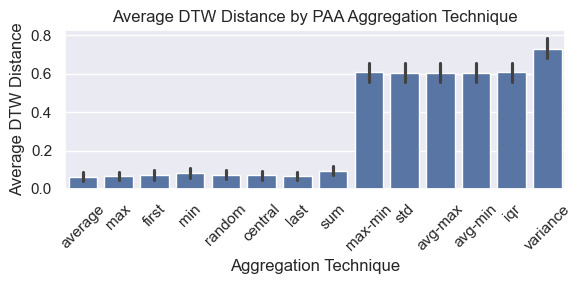

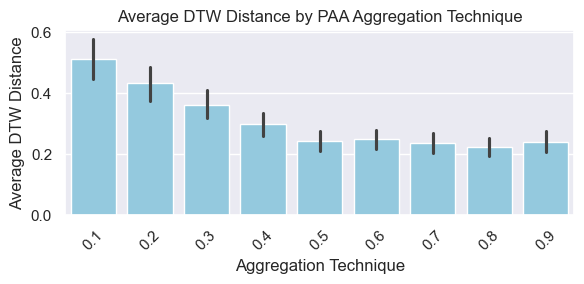

In [57]:
# Plota um gráfico de barras com os resultados médios de DTW por técnica de agregação
plt.figure(figsize=(6, 3))
sns.barplot(data=dtw_means, x='aggregation', y='average_dtw')
plt.title('Average DTW Distance by PAA Aggregation Technique')
plt.xlabel('Aggregation Technique')
plt.ylabel('Average DTW Distance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plota um gráfico de barras com os resultados médios de DTW por taxa de redução
plt.figure(figsize=(6, 3))
sns.barplot(data=dtw_means, x='reduction_rate', y='average_dtw', color='skyblue')
plt.title('Average DTW Distance by PAA Aggregation Technique')
plt.xlabel('Aggregation Technique')
plt.ylabel('Average DTW Distance')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

### 1.1.1 Análises por técnica de agregação para cada dataset

Como cada Dataset pode ter um comportamento diferente dependendo da técnica de agregação utilizada, iremos analisar os resultados agrupando-os por técnica de agregação e por dataset para termos uma visão mais detalhada do desempenho de cada técnica para cada dataset.

In [24]:
# Agrupa os resultados por dataset e técnica de agregação, calculando a média da distância DTW
dataset_agg_dtw_means = paa_results.groupby(['dataset', 'aggregation'])['dtw'].mean().reset_index()
# Renomeia a coluna de dtw para average_dtw
dataset_agg_dtw_means.rename(columns={'dtw': 'average_dtw'}, inplace=True)

dataset_agg_dtw_means

,dataset,aggregation,average_dtw
0,ACSF1,average,0.491589
1,ACSF1,avg-max,0.700919
2,ACSF1,avg-min,0.685158
3,ACSF1,central,0.559245
4,ACSF1,first,0.557120
...,...,...,...
289,StarLightCurves,min,0.000481
290,StarLightCurves,random,0.000570
291,StarLightCurves,std,0.526129
292,StarLightCurves,sum,0.036172


Agora conseguimos analisar cada método de forma isolada para cada dataset, o que nos permite identificar quais técnicas de agregação funcionam melhor para determinados tipos de séries temporais presentes em cada dataset.

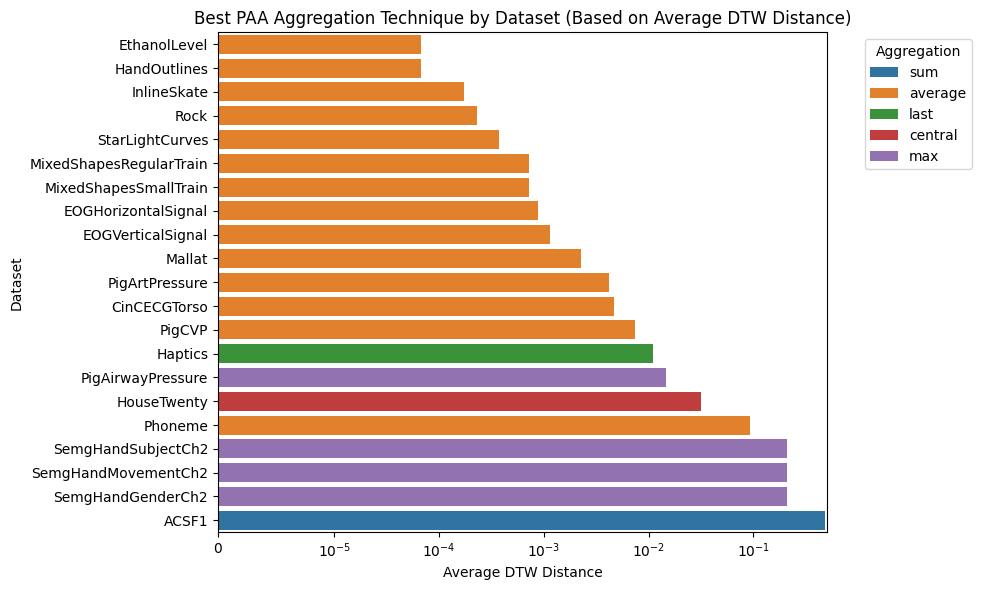

In [36]:
# Gera uma tabela que contem uma linha para cada dataset e o melhor metodo de agregaçao baseado no menor valor de DTW médio
best_agg_per_dataset = dataset_agg_dtw_means.loc[dataset_agg_dtw_means.groupby('dataset')['average_dtw'].idxmin()].reset_index(drop=True)

plt.figure(figsize=(10, 6))
order_ds = best_agg_per_dataset.sort_values('average_dtw')['dataset']
sns.barplot(data=best_agg_per_dataset, y='dataset', x='average_dtw', hue='aggregation', order=order_ds)
plt.xscale('symlog', linthresh=1e-5)  # ajusta linthresh conforme necessário (ex.: 1e-5)
plt.xlabel('Average DTW Distance')
plt.ylabel('Dataset')
plt.title('Best PAA Aggregation Technique by Dataset (Based on Average DTW Distance)')
plt.legend(title='Aggregation', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

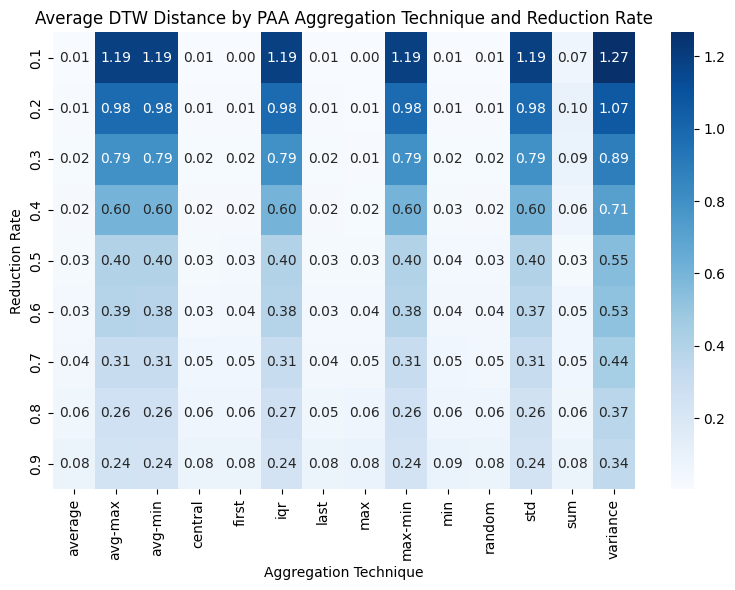

In [49]:
# Agrupa os resultados por técnica de agregação e taxa de redução, calculando a média da distância DTW
reduction_agg_dtw_means = paa_results.groupby(['reduction_rate', 'aggregation'])['dtw'].mean().reset_index()
# Renomeia a coluna de dtw para average_dtw
reduction_agg_dtw_means.rename(columns={'dtw': 'average_dtw'}, inplace=True)


# Plota um heatmap com os resultados médios de DTW por técnica de agregação e taxa de redução
pivot_table = reduction_agg_dtw_means.pivot(index='reduction_rate', columns='aggregation', values='average_dtw')
plt.figure(figsize=(8, 6))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap='Blues')
plt.title('Average DTW Distance by PAA Aggregation Technique and Reduction Rate')
plt.xlabel('Aggregation Technique')
plt.ylabel('Reduction Rate')
plt.tight_layout()
plt.show()

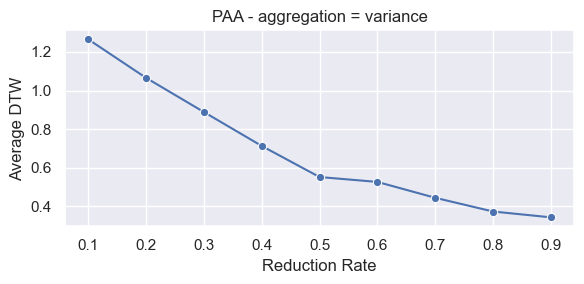

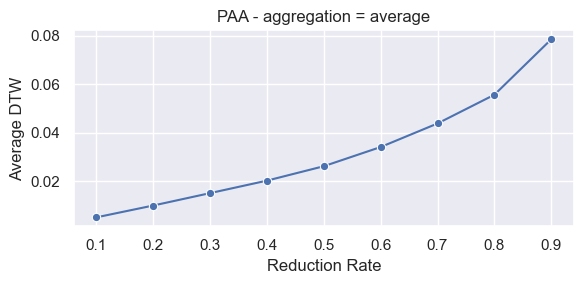

In [53]:
# Filtra e exibe apenas os resultados da técnica de agregação "variance"
variance_df = reduction_agg_dtw_means[reduction_agg_dtw_means['aggregation'] == 'variance'].sort_values('reduction_rate')
# Filtra e exibe apenas os resultados da técnica de agregação "average"
average_df = reduction_agg_dtw_means[reduction_agg_dtw_means['aggregation'] == 'average'].sort_values('reduction_rate')

# Plota apenas a série da agregação "variance"
plt.figure(figsize=(6, 3))
sns.lineplot(data=variance_df, x='reduction_rate', y='average_dtw', marker='o')
plt.title(f"PAA - aggregation = {agg}")
plt.xlabel('Reduction Rate')
plt.ylabel('Average DTW')
plt.tight_layout()
plt.show()

# PLota apenas a série da agregação "average"
plt.figure(figsize=(6, 3))
sns.lineplot(data=average_df, x='reduction_rate', y='average_dtw', marker='o')
plt.title(f"PAA - aggregation = average")
plt.xlabel('Reduction Rate')
plt.ylabel('Average DTW')
plt.tight_layout()
plt.show()
